# 绘制其在银道面坐标下的分布

## 绘制侧向分布

In [1]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import numpy as np
from astropy import units as u
import pandas as pd

# 遍历数据，直接转换为银道坐标 l 和 b
l_list = []
b_list = []


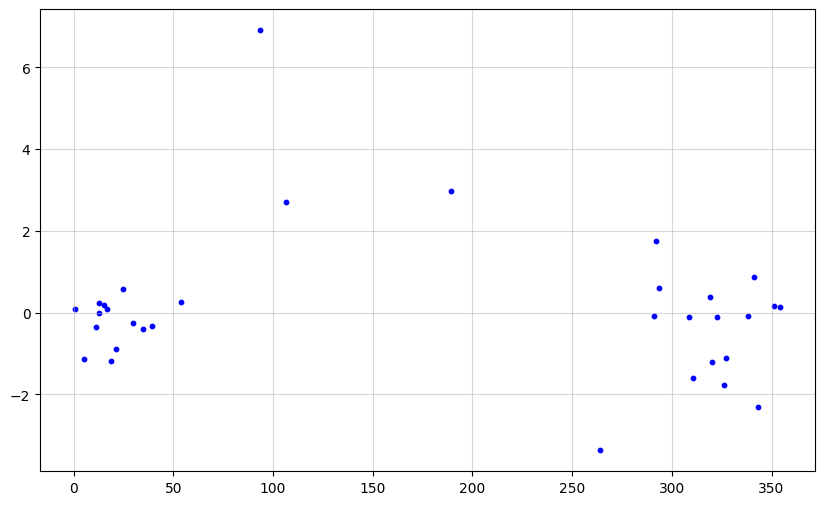

In [2]:
df = pd.read_csv("../cat/composite_merged.csv")
df_plot = df
for index, row in df_plot.iterrows():
    # 将 RA 和 Dec 解析为 SkyCoord 对象
    c = SkyCoord(row["J2000_ra (hh:mm:ss)"], 
                 row["J2000_dec (dd:mm:ss)"], 
                 frame="icrs", unit=(u.hourangle, u.deg))
    # 转换为银道坐标
    l_list.append(c.galactic.l.value)  
    b_list.append(c.galactic.b.value)  
    
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.scatter(l_list, b_list, s=10, color="blue")
ax.grid(True, alpha=0.5)
# 只显示b在-10 10度间的
#ax.set_ylim(-10 * np.pi / 180, 10 * np.pi / 180)

# 添加标题和图例
#plt.title("Distribution of 48 Composite SNRs in Galactic Coordinates (Mollweide)", pad=20)

plt.show()

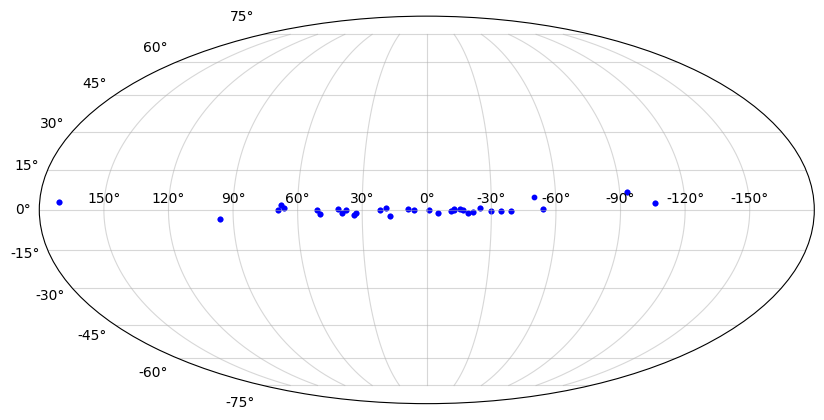

In [4]:
for index, row in df_plot.iterrows():

    c = SkyCoord(row["J2000_ra (hh:mm:ss)"], 
                 row["J2000_dec (dd:mm:ss)"], 
                 frame="icrs", unit=(u.hourangle, u.deg))
    
    # 转为弧度,转为 [-180°, 180°]

    l_list.append(np.radians(c.galactic.l.wrap_at(180 * u.deg).value))  # 转为 [-180°, 180°]
    b_list.append(np.radians(c.galactic.b.value))  # 转为弧度

plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection="mollweide")
ax.scatter(l_list, b_list, s=10, color="blue")
ax.grid(True, alpha=0.5)
ax.set_xticklabels(['150°', '120°', '90°', '60°', '30°', '0°', '-30°', '-60°', '-90°', '-120°', '-150°'])

plt.show()

## 绘制横向分布

借用脚本，脚本需要提供数据坐标数据文件，共5列数据。

 银经 银纬 距离 距离上限 距离下限

 309.800  -2.600  2.5    0.5  -0.5

 284.300  -1.800  3.5    0.5  -0.5

 因此，我们需要整理表格到要求的格式。



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

# 读取数据
df = pd.read_csv("../cat/composite_merged.csv")

# 初始化存储列表
l_list, b_list, dist_list, dist_err_list = [], [], [], []

# 遍历数据并转换坐标
for _, row in df.iterrows():
    c = SkyCoord(row["J2000_ra (hh:mm:ss)"], 
                 row["J2000_dec (dd:mm:ss)"], 
                 frame="icrs", unit=(u.hourangle, u.deg))

    l_list.append(c.galactic.l.deg)
    b_list.append(c.galactic.b.deg)

    # 计算距离及误差
    dist = (row['distance_min (kpc)'] + row['distance_max (kpc)']) / 2
    dist_err = (row['distance_max (kpc)'] - row['distance_min (kpc)']) / 2

    dist_list.append(dist)
    dist_err_list.append(dist_err)

# 将数据转换为 NumPy 数组
data = np.array([l_list, b_list, dist_list, dist_err_list, -np.array(dist_err_list)]).T

print(data)

np.savetxt("../data/coords_snr.txt", data, fmt="%.2f", delimiter="   ")

[[ 8.69145805e-01  8.37503682e-02  9.17000000e+00  8.30000000e-01
  -8.30000000e-01]
 [ 5.34836263e+00 -1.13279866e+00  4.54500000e+00  6.55000000e-01
  -6.55000000e-01]
 [ 1.11816164e+01 -3.46764888e-01  4.20000000e+00  5.00000000e-01
  -5.00000000e-01]
 [ 1.25882694e+01  2.22250476e-01             nan             nan
              nan]
 [ 1.28338988e+01 -1.86007577e-02             nan             nan
              nan]
 [ 1.54187239e+01  1.78614462e-01  7.30000000e+00  2.50000000e+00
  -2.50000000e+00]
 [ 1.67339271e+01  8.86955233e-02  1.40000000e+01  1.00000000e-01
  -1.00000000e-01]
 [ 1.89522692e+01 -1.18488734e+00  3.15000000e+00  1.55000000e+00
  -1.55000000e+00]
 [ 2.15015445e+01 -8.86985022e-01  4.40000000e+00  2.00000000e-01
  -2.00000000e-01]
 [ 2.46628016e+01  5.88209298e-01  3.21500000e+00  4.85000000e-01
  -4.85000000e-01]
 [ 2.97046782e+01 -2.44129221e-01  5.60000000e+00  3.00000000e-01
  -3.00000000e-01]
 [ 3.46683106e+01 -3.91579566e-01  2.70000000e+00  6.00000000e-01

We have 33 sources.


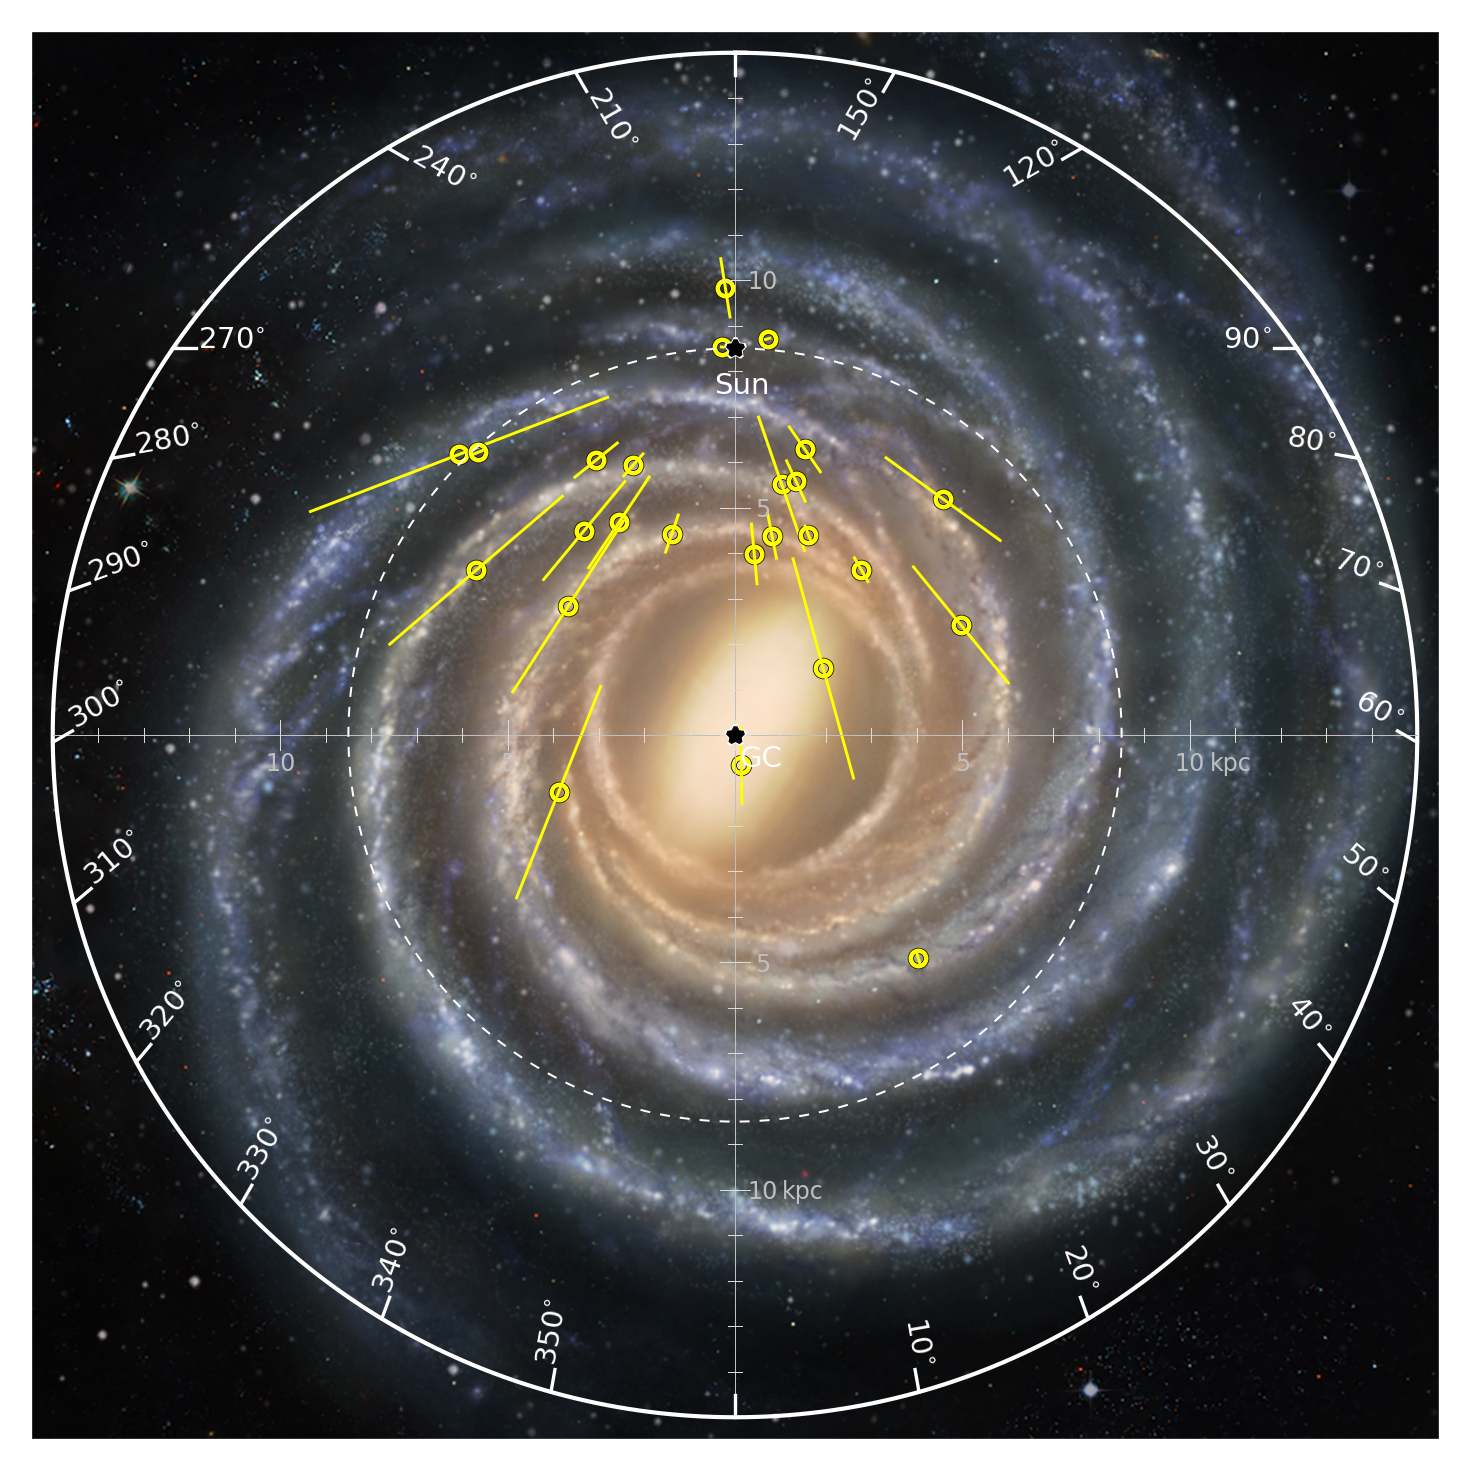

Saved ../figures/dist.pdf


In [1]:
import sys
sys.path.append("../utils")
import distribution

file_coords = "../data/coords_snr.txt"
output = "../figures/dist.pdf"
distribution.plot_dist(file_coords, output)
